In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/vmaru/Desktop/Sampling/fotbal_prestupy_2000_2019.csv")


df.head()

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


In [3]:
unikatni_ligy = df['Původní liga'].unique()
print(unikatni_ligy)


['LaLiga' 'Serie A' 'Premier League' 'Ligue 1' 'LaLiga2' ' Brazil'
 ' Argentina' 'Serie B' '1.Bundesliga' 'Premier Liga' 'Liga NOS'
 ' Czech Republic' ' Serbia' 'Eredivisie' ' England' ' Scotland'
 'Süper Lig' 'Eliteserien' ' Croatia' 'Super League' ' Mexico' ' Chile'
 'Ligue 2' ' Uruguay' ' Bulgaria' ' Korea, South' 'Ekstraklasa' ' Sweden'
 ' Latvia' '2.Bundesliga' 'J1 - 2nd Stage' ' Finland' ' Denmark'
 'Jupiler Pro League' ' Saudi Arabia' ' Australia' 'First Division'
 ' Portugal' ' Slovakia' ' Romania' 'Vysheyshaya Liga' ' China'
 '1.Liga gr. 1' ' Iran' 'Bundesliga' ' Venezuela' 'Primera Div. Apertura'
 'Second Division (bis 03/04)' ' France' 'Auf-/Abstiegsrunde NLA/NLB'
 'U19 Eredivisie' '1.Lig' ' United States' 'Challenge League'
 'Premiership' "Ligat ha'Al" 'K League 1' 'HET Liga' 'MLS' ' Spain'
 ' Tunisia' ' South Africa' 'Virsliga' 'Serie C - A' 'Regionalliga Nord'
 ' Colombia' ' Russia' ' Moldova' 'Championship' 'Série A' 'Superligaen'
 'J1 League' ' Peru' ' Paraguay' 'NB I.'

In [4]:
df['Původní liga'] = df['Původní liga'].str.strip()


mapovani_lig = {
    'LaLiga': 'La Liga',
    'LaLiga2': 'La Liga 2',
    'Serie A': 'Serie A',
    'Serie B': 'Serie B',
    'Serie C - A': 'Serie C',
    'Serie C - B': 'Serie C',
    '1.Bundesliga': 'Bundesliga',
    '2.Bundesliga': '2. Bundesliga',
    'Ekstraklasa': 'Ekstraklasa',
    'SuperLiga': 'Super League Serbia',
    'Süper Lig':'Super League Turkey',
    'Superligaen Championship round': 'Superligaen',
    'MLS': 'Major League Soccer',
    'U18 Premier League': 'Premier League Youth',
    'U19 Eredivisie': 'Eredivisie Youth',
    'Challenge League': 'Swiss Challenge League',
    'J1 League': 'J League',
    'J2 League': 'J League 2',
    'Liga MX Apertura': 'Liga MX',
    'Liga MX Clausura': 'Liga MX',
    'K Ligue 1':'Ligue 1 South Korea',
    'Liga 1':'Ligue 1 Romania', 
    'Série B':'Serie B',
    '1.Lig':'Ligue 1 Turkey', 
    'League One':'Ligue 1',
    'K League 1': 'Ligue 1 South Korea',
    'Premiership': 'Premier League',
    'Série A': 'Serie A',
    'Primera División':'La Liga',
    '1.Division':'La Liga',

    # Přidejte další podle potřeby...
}


df['Původní liga'] = df['Původní liga'].replace(mapovani_lig)

# Kontrola unikátních hodnot po standardizaci
print(df['Původní liga'].unique())


['La Liga' 'Serie A' 'Premier League' 'Ligue 1' 'La Liga 2' 'Brazil'
 'Argentina' 'Serie B' 'Bundesliga' 'Premier Liga' 'Liga NOS'
 'Czech Republic' 'Serbia' 'Eredivisie' 'England' 'Scotland'
 'Super League Turkey' 'Eliteserien' 'Croatia' 'Super League' 'Mexico'
 'Chile' 'Ligue 2' 'Uruguay' 'Bulgaria' 'Korea, South' 'Ekstraklasa'
 'Sweden' 'Latvia' '2. Bundesliga' 'J1 - 2nd Stage' 'Finland' 'Denmark'
 'Jupiler Pro League' 'Saudi Arabia' 'Australia' 'First Division'
 'Portugal' 'Slovakia' 'Romania' 'Vysheyshaya Liga' 'China' '1.Liga gr. 1'
 'Iran' 'Venezuela' 'Primera Div. Apertura' 'Second Division (bis 03/04)'
 'France' 'Auf-/Abstiegsrunde NLA/NLB' 'Eredivisie Youth' 'Ligue 1 Turkey'
 'United States' 'Swiss Challenge League' "Ligat ha'Al"
 'Ligue 1 South Korea' 'HET Liga' 'Major League Soccer' 'Spain' 'Tunisia'
 'South Africa' 'Virsliga' 'Serie C' 'Regionalliga Nord' 'Colombia'
 'Russia' 'Moldova' 'Championship' 'Superligaen' 'J League' 'Peru'
 'Paraguay' 'NB I.' 'Ukraine' 'Torneo Fin

In [5]:
info = df.groupby('Původní liga')['Původní tým'].apply(list)



clubs = df['Původní tým'].unique()


# Initialize the count matrix
count_matrix = np.zeros((len(clubs), len(info)), dtype=int)

# Use numpy's vectorized string operations to count occurrences
nan_matrix = np.zeros((len(clubs), len(info)), dtype=int)

# Populate the count matrix
for i, club in enumerate(clubs):
    for j, teams in enumerate(info):
        nan_matrix[i, j] = list(teams).count(club)  # Count occurrences

# Check the resulting shape
print(count_matrix.shape)



(570, 108)


In [6]:
clubs

array(['FC Barcelona', 'Parma', 'Arsenal', 'Fiorentina', 'Real Madrid',
       'West Ham', 'Dep. La Coruña', 'Real Zaragoza', 'Monaco',
       'Valencia CF', 'Atlético Madrid', 'Atlético-PR', 'River Plate',
       'Boca Juniors', 'Stade Rennais', 'Coventry City',
       'Cagliari Calcio', 'Bay. Leverkusen', 'Chelsea', 'Dynamo Kyiv',
       'Inter', 'RCD Mallorca', 'G. Bordeaux', 'FC Porto', 'Benfica',
       'Lazio', 'Real Betis', 'Everton', 'Sparta Praha', 'Málaga CF',
       'Partizan', 'Celta de Vigo', 'Sporting CP', 'Aston Villa',
       'AFC Ajax', 'São Paulo', 'Marseille', 'Racing', 'Lens', 'MK Dons',
       'CD Tenerife', 'Norwich', 'Celtic', 'Fenerbahce', 'Middlesbrough',
       'Internacional', 'Leicester', 'Rosenborg BK', 'Dinamo Zagreb',
       'Feyenoord', 'Grasshoppers', 'Olympiacos', 'Bolton', 'Reggina',
       'Juventus', 'Fluminense', 'Lecce', 'Liverpool', 'CD Cruz Azul',
       'U. de Chile', 'Ponte Preta', 'Vitesse', 'Galatasaray',
       'Montpellier', 'Roda JC', 'Re

In [7]:
# checking if any team belong to at list one league 
np.where((np.sum(nan_matrix, axis = 1) > 0) == False)

info.index

Index(['1.HNL', '1.Liga gr. 1', '2. Bundesliga', '2ª B - Grupo I',
       '2ª B - Grupo III', '3.Liga', 'A Grupa - Championship gr.',
       'Allsvenskan', 'Argentina', 'Auf-/Abstiegsrunde NLA/NLB',
       ...
       'Torneo Inicial', 'Tunisia', 'UAE Gulf League', 'Ukraine',
       'United Arab Emirates', 'United States', 'Uruguay', 'Venezuela',
       'Virsliga', 'Vysheyshaya Liga'],
      dtype='object', name='Původní liga', length=108)

In [8]:
# Inexes of teams that belong to at least 2 different league 
np.where((np.sum(nan_matrix, axis = 1) >= 2) == True)

indexes = np.argmax(nan_matrix, axis =1)


In [9]:
safe_values = []
for idx in indexes:
    safe_values.append(info.index[idx])


clubs_dict = {clubs[i]: safe_values[i] for i in range(len(clubs))}

df['Původní liga actual'] = df['Původní tým'].replace(clubs_dict)

In [10]:
df_premier = df.loc[np.where(df['Původní tým'] == 'Anzhi')]


df_premier.head()

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka,Původní liga actual
2735,Balázs Dzsudzsák,Left Winger,25,Anzhi,Russia,Dinamo Moscow,Russia,2011-2012,14000000.0,19000000,Premier Liga
2838,Diego Tardelli,Centre-Forward,26,Anzhi,Russia,Al Gharafa,Stars League,2011-2012,2500000.0,7000000,Premier Liga
2998,Christopher Samba,Centre-Back,28,Anzhi,Premier Liga,QPR,Premier League,2012-2013,15000000.0,15000000,Premier Liga
3227,Willian,Right Winger,25,Anzhi,Premier Liga,Chelsea,Premier League,2013-2014,30000000.0,35500000,Premier Liga
3248,Aleksandr Kokorin,Centre-Forward,22,Anzhi,Premier Liga,Dinamo Moscow,Premier Liga,2013-2014,15000000.0,19000000,Premier Liga


In [11]:
df.loc[df['Původní tým'] == '1. FC Köln']

,Jméno,Pozice,Věk,Původní tým,Původní liga,Nový tým,Nová Liga,Sezóna,Odhadovaná hodnota,Přestupová částka,Původní liga actual
226,Pascal Ojigwe,Defensive Midfield,23,1. FC Köln,Bundesliga,Bay. Leverkusen,1.Bundesliga,2000-2001,NaN,2100000,2. Bundesliga
645,Hanno Balitsch,Defensive Midfield,21,1. FC Köln,2. Bundesliga,Bay. Leverkusen,1.Bundesliga,2002-2003,NaN,2000000,2. Bundesliga
719,Christian Timm,Right Winger,23,1. FC Köln,2. Bundesliga,1.FC K'lautern,1.Bundesliga,2002-2003,NaN,1000000,2. Bundesliga
1510,Lukas Podolski,Centre-Forward,21,1. FC Köln,2. Bundesliga,Bayern Munich,1.Bundesliga,2006-2007,12000000.0,10000000,2. Bundesliga
2996,Lukas Podolski,Centre-Forward,27,1. FC Köln,2. Bundesliga,Arsenal,Premier League,2012-2013,20000000.0,15000000,2. Bundesliga
3946,Kevin Wimmer,Centre-Back,22,1. FC Köln,Bundesliga,Spurs,Premier League,2015-2016,7500000.0,6000000,2. Bundesliga
4072,Yannick Gerhardt,Left-Back,22,1. FC Köln,Bundesliga,VfL Wolfsburg,1.Bundesliga,2016-2017,4500000.0,13000000,2. Bundesliga
4478,Anthony Modeste,Centre-Forward,30,1. FC Köln,2. Bundesliga,TJ Quanjian,Super League,2018-2019,16000000.0,29000000,2. Bundesliga
4634,Leonardo Bittencourt,Left Winger,24,1. FC Köln,2. Bundesliga,TSG Hoffenheim,1.Bundesliga,2018-2019,6000000.0,6000000,2. Bundesliga
4698,Yuya Osako,Second Striker,28,1. FC Köln,2. Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000,2. Bundesliga


In [12]:

# Create a dictionary for cleaned results
clean_puvodni_team = clubs_dict

clean_puvodni_team['El Masry'] = 'Premier League Egypt'
clean_puvodni_team['Enppi'] = 'Premier League Egypt'



In [ ]:
my_dict = clean_puvodni_team

# Dictionary to group keys by values
value_to_keys = {}

for key, value in my_dict.items():
    if value not in value_to_keys:
        value_to_keys[value] = []  # Initialize an empty list for this value
    value_to_keys[value].append(key)  # Add the key to the list



['FC Barcelona',
 'Real Madrid',
 'Dep. La Coruña',
 'Real Zaragoza',
 'Valencia CF',
 'Atlético Madrid',
 'RCD Mallorca',
 'Real Betis',
 'Málaga CF',
 'Celta de Vigo',
 'Racing',
 'U. de Chile',
 'Real Valladolid',
 'Levante UD',
 'Nacional',
 'Sevilla FC',
 'Peñarol',
 'Espanyol',
 'Alavés',
 'UD Las Palmas',
 'Real Sociedad',
 'Villarreal CF',
 'Albacete',
 'Athletic Bilbao',
 'CA Osasuna',
 'Getafe CF',
 'Audax Italiano',
 'Recr. Huelva',
 'UD Almería',
 'Huracán',
 'Rentistas',
 'Granada CF',
 'Rayo Vallecano',
 'SD Eibar',
 'CD Leganés']

In [ ]:
clean_puvodni_team['Zorya Lugansk'] = 'Premier Liga Ukraine'

clean_puvodni_team['Shakhtar D.'] = 'Premier Liga Ukraine'

clean_puvodni_team['Metalurh Z.'] = 'Premier Liga Ukraine'

clean_puvodni_team['Metalurh D.'] = 'Premier Liga Ukraine'

clean_puvodni_team['Metalist'] = 'Premier Liga Ukraine'

clean_puvodni_team['Dynamo Kyiv'] = 'Premier Liga Ukraine'

clean_puvodni_team['Dynamo Kyiv'] = 'Premier Liga Ukraine'

clean_puvodni_team['Dnipro'] = 'Premier Liga Ukraine'



['Monza',
 'Bari',
 'Vicenza',
 'Ternana',
 'Hellas Verona',
 'Brescia',
 'Anconitana',
 'Como',
 'UC AlbinoLeffe',
 'Arezzo',
 'Modena',
 'Rimini',
 'Grosseto',
 'Novara',
 'Cittadella',
 'Ascoli']

In [15]:
clean_puvodni_team['Partizan'] = 'Serbia'

clean_puvodni_team['Red Star'] = 'Serbia'


In [16]:
clean_puvodni_team['FK Teplice'] = 'HET Liga'

clean_puvodni_team['Slovan Liberec'] = 'HET Liga'


In [17]:
clean_puvodni_team['Albacete'] = 'La Liga 2'

clean_puvodni_team['Audax Italiano'] = 'Chile'

clean_puvodni_team['Dep. La Coruña'] = 'La Liga 2'

clean_puvodni_team['Granada CF'] = 'La Liga 2'

clean_puvodni_team['Huracán'] = 'Argentina'

clean_puvodni_team['Levante UD'] = 'La Liga 2'

clean_puvodni_team['Málaga CF'] = 'La Liga 2'

clean_puvodni_team['Nacional'] = 'Uruguay'

clean_puvodni_team['Peñarol'] = 'Uruguay'

clean_puvodni_team['Racing'] = 'Argentina'

clean_puvodni_team['Real Zaragoza'] = 'La Liga 2'

clean_puvodni_team['Recr. Huelva'] = 'Spain'

clean_puvodni_team['Rentistas'] = 'Uruguay'

clean_puvodni_team['Real Zaragoza'] = 'La Liga 2'

clean_puvodni_team['SD Eibar'] = 'La Liga 2'

clean_puvodni_team['U. de Chile'] = 'Chili'

clean_puvodni_team['UD Almería'] = 'La Liga 2'




In [18]:
new_clubs = df['Nový tým'].unique()

sum_1 = 0 
indexes = []
for i in range(len(new_clubs)):
    if new_clubs[i] in clean_puvodni_team:
        sum_1 += 1
    else:
        sum_1 += 0
        indexes.append(i)
        
sum_1

len(indexes)

45

In [19]:
df['Nová  Liga'] = df['Nová  Liga'].replace(mapovani_lig)


In [20]:
# checking new clubs that is not in dict 
checking = new_clubs[indexes]
checking.tolist

<function ndarray.tolist>

In [21]:
indices = df.index[df['Nový tým'].isin(checking)].tolist()

last = df.iloc[indices]

clean_puvodni_team['Pyramids FC'] = 'Premier League Egypt'

clean_puvodni_team['SPAL'] = 'Serie B'

df['Nová liga actual'] = df['Nový tým'].replace(clean_puvodni_team)
df['Původní liga actual'] = df['Původní tým'].replace(clean_puvodni_team)


In [22]:
df.dtypes

Jméno                   object
Pozice                  object
Věk                      int64
Původní tým             object
Původní liga            object
Nový tým                object
Nová  Liga              object
Sezóna                  object
Odhadovaná hodnota     float64
Přestupová částka        int64
Původní liga actual     object
Nová liga actual        object
dtype: object

In [23]:
# Prumerna castka podle sezony 
avg_fees_by_season = (df.groupby('Sezóna')['Přestupová částka'].describe().astype(int).reset_index())
avg_fees_by_season


,Sezóna,count,mean,std,min,25%,50%,75%,max
0,2000-2001,248,7511693,7880313,1800000,2800000,4500000,8750000,60000000
1,2001-2002,250,8308320,9400337,1800000,3000000,5275000,9000000,77500000
2,2002-2003,244,4697438,6148925,825000,1500000,2555000,5250000,46000000
3,2003-2004,242,4580619,5434759,1000000,1600000,2500000,4962500,37500000
4,2004-2005,248,5621733,5640324,1500000,2250000,3500000,7000000,38500000
5,2005-2006,247,5441578,5030618,2000000,2500000,3600000,6000000,38000000
6,2006-2007,249,6196144,4997669,2500000,3150000,4500000,7000000,43300000
7,2007-2008,248,8656209,5813961,3950000,4970000,6800000,10000000,38000000
8,2008-2009,250,8494880,5988994,3800000,4700000,6350000,10000000,43000000
9,2009-2010,249,8758112,9711269,3300000,4000000,5700000,9000000,94000000


In [24]:
avg_fees_by_season = (df.groupby('Sezóna')['Přestupová částka'].describe().astype(int).reset_index())
                                  
avg_fees_by_season      


,Sezóna,count,mean,std,min,25%,50%,75%,max
0,2000-2001,248,7511693,7880313,1800000,2800000,4500000,8750000,60000000
1,2001-2002,250,8308320,9400337,1800000,3000000,5275000,9000000,77500000
2,2002-2003,244,4697438,6148925,825000,1500000,2555000,5250000,46000000
3,2003-2004,242,4580619,5434759,1000000,1600000,2500000,4962500,37500000
4,2004-2005,248,5621733,5640324,1500000,2250000,3500000,7000000,38500000
5,2005-2006,247,5441578,5030618,2000000,2500000,3600000,6000000,38000000
6,2006-2007,249,6196144,4997669,2500000,3150000,4500000,7000000,43300000
7,2007-2008,248,8656209,5813961,3950000,4970000,6800000,10000000,38000000
8,2008-2009,250,8494880,5988994,3800000,4700000,6350000,10000000,43000000
9,2009-2010,249,8758112,9711269,3300000,4000000,5700000,9000000,94000000


In [25]:
league_counts = df.groupby('Původní liga actual').size().sort_values(ascending=False)

# Select the top 15 leagues
top_15_leagues = league_counts.head(15).index

filtered_df = df.loc[df['Původní liga'].isin(top_15_leagues)]

# Group by 'Původní liga' and compute descriptive statistics
league_stats = (filtered_df.groupby('Původní liga')['Přestupová částka'].describe().astype(int).reset_index())

league_stats


,Původní liga,count,mean,std,min,25%,50%,75%,max
0,Argentina,66,5510000,5575000,850000,2500000,3775000,6000000,35900000
1,Bundesliga,287,11374425,11958826,1000000,4850000,8000000,13000000,115000000
2,Championship,197,7874416,4863884,1500000,4500000,7000000,10000000,35000000
3,Eredivisie,190,8205684,6496825,950000,4000000,6000000,10375000,40000000
4,Jupiler Pro League,91,6679010,4616322,1100000,3000000,6000000,8115000,25000000
5,La Liga,465,12718688,15284517,1400000,5000000,8000000,15000000,222000000
6,La Liga 2,59,6866949,4162616,1500000,4050000,6000000,8800000,22500000
7,Liga NOS,178,12537528,10725553,1000000,4000000,8300000,19750000,45000000
8,Ligue 1,444,10162027,11085045,1000000,5000000,7300000,11000000,135000000
9,Premier League,634,11733296,13159250,1000000,4500000,7500000,13737500,125000000


In [26]:
df.loc[np.where(df['Pozice'] != 'Forward')].groupby('Pozice')

In [27]:
stat_fees_by_position = (
    df.loc[np.where(df['Pozice'] != 'Forward')].groupby('Pozice').filter(lambda x: len(x) > 1)
    .groupby('Pozice')['Přestupová částka']
    .describe().astype(int).reset_index()
)

stat_fees_by_position


,Pozice,count,mean,std,min,25%,50%,75%,max
0,Attacking Midfield,426,9824178,11833314,1000000,4025000,6950000,10000000,125000000
1,Central Midfield,487,10096242,9858211,1000000,4400000,7000000,12000000,105000000
2,Centre-Back,714,8448592,8231238,825000,4000000,6000000,10000000,78800000
3,Centre-Forward,1218,9590270,10135570,900000,4100000,6800000,11000000,117000000
4,Defensive Midfield,411,8992019,7863865,950000,4000000,6900000,11000000,57000000
5,Goalkeeper,180,7622666,7801847,900000,3575000,5500000,8687500,62500000
6,Left Midfield,87,6717126,5914145,1000000,3000000,4700000,8500000,38700000
7,Left Winger,267,12904644,17020930,1000000,5500000,8200000,15000000,222000000
8,Left-Back,225,7718933,6717719,900000,3800000,5500000,9750000,57500000
9,Right Midfield,63,7404126,8965854,1000000,2365000,4500000,8750000,48000000


In [28]:
avg_est_fees_by_season = (
    df.dropna(subset=['Odhadovaná hodnota'])
    .groupby('Sezóna')['Odhadovaná hodnota']
    .describe().astype(int).reset_index()
)

avg_est_fees_by_season



,Sezóna,count,mean,std,min,25%,50%,75%,max
0,2004-2005,59,4110169,4044022,50000,1375000,2800000,5375000,15000000
1,2005-2006,219,5715525,5949522,50000,2500000,4000000,7000000,45000000
2,2006-2007,229,6600021,6258176,50000,3000000,5000000,8000000,51000000
3,2007-2008,235,7138255,6111764,50000,3450000,5500000,9100000,45000000
4,2008-2009,243,7079012,5413141,700000,3500000,6000000,8750000,35000000
5,2009-2010,247,7265991,7901192,50000,3000000,5000000,8750000,60000000
6,2010-2011,241,7400207,6806042,100000,3500000,5500000,9000000,50000000
7,2011-2012,248,8453830,6847499,250000,4500000,6500000,11000000,54000000
8,2012-2013,246,8806910,7604210,150000,4000000,7000000,10500000,47500000
9,2013-2014,248,9969455,9545874,475000,4500000,7100000,12000000,65000000


In [29]:
# Group by 'Původní liga' and compute descriptive statistics
league_stats_est = (filtered_df.groupby('Původní liga')['Odhadovaná hodnota'].describe().astype(int).reset_index())

league_stats_est


,Původní liga,count,mean,std,min,25%,50%,75%,max
0,Argentina,3,7166666,6788470,3000000,3250000,3500000,9250000,15000000
1,Bundesliga,242,11620454,9870133,700000,5125000,8500000,14000000,65000000
2,Championship,184,4645163,3615208,50000,2000000,4000000,6575000,20000000
3,Eredivisie,138,7592391,4810905,700000,4125000,6500000,9750000,28000000
4,Jupiler Pro League,65,6766153,3504150,1500000,5000000,6000000,8000000,22000000
5,La Liga,397,10952720,11115677,150000,5000000,7500000,12500000,100000000
6,La Liga 2,30,5916666,4069553,600000,3187500,5500000,8000000,15000000
7,Liga NOS,142,11030633,8615436,100000,3500000,8250000,16875000,37000000
8,Ligue 1,336,8948511,10092333,50000,4375000,6500000,10000000,120000000
9,Premier League,491,10752036,10177261,250000,5000000,7500000,13000000,90000000


In [30]:
stat_fees_est_by_position = (
    df.groupby('Pozice')
    .filter(lambda x: len(x) > 1 and x['Odhadovaná hodnota'].notna().any())
    .groupby('Pozice')['Odhadovaná hodnota']
    .describe()
    .reset_index()  # Ensures 'Pozice' is a column

)

stat_fees_est_by_position

,Pozice,count,mean,std,min,25%,50%,75%,max
0,Attacking Midfield,316.0,9.512975e+06,9.894951e+06,50000.0,4000000.0,6850000.0,10000000.0,90000000.0
1,Central Midfield,384.0,9.363867e+06,9.144557e+06,50000.0,4000000.0,7000000.0,12000000.0,70000000.0
2,Centre-Back,508.0,7.123465e+06,6.065726e+06,50000.0,3000000.0,6000000.0,9000000.0,45000000.0
3,Centre-Forward,861.0,8.753200e+06,9.360860e+06,50000.0,3500000.0,6000000.0,10500000.0,100000000.0
4,Defensive Midfield,291.0,9.027491e+06,7.839116e+06,50000.0,4000000.0,7000000.0,11250000.0,50000000.0
5,Goalkeeper,118.0,6.894958e+06,7.137490e+06,50000.0,3000000.0,5000000.0,8000000.0,60000000.0
6,Left Midfield,45.0,7.040556e+06,4.059736e+06,475000.0,4500000.0,6000000.0,9000000.0,20000000.0
7,Left Winger,238.0,1.026092e+07,1.071710e+07,50000.0,4000000.0,7000000.0,14000000.0,100000000.0
8,Left-Back,170.0,6.698676e+06,4.832710e+06,125000.0,3000000.0,5300000.0,9875000.0,24000000.0
9,Right Midfield,28.0,5.585714e+06,4.642330e+06,225000.0,3100000.0,4750000.0,6350000.0,22000000.0


<Axes: ylabel='Sezóna'>

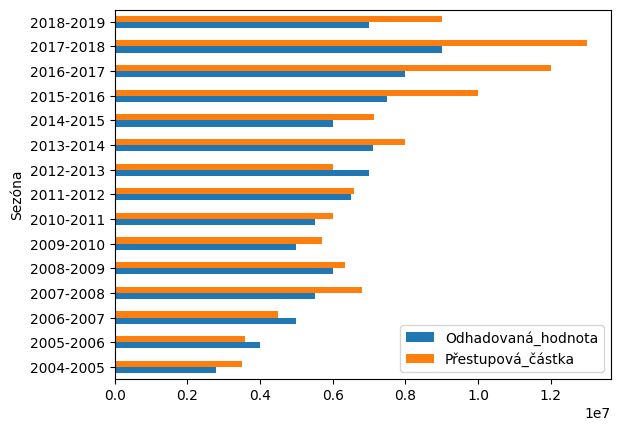

In [31]:


plot1_data = pd.DataFrame({
    'Odhadovaná_hodnota': avg_est_fees_by_season['50%'].values,
    'Přestupová_částka': avg_fees_by_season['50%'][4:].values
}, index= avg_est_fees_by_season['Sezóna'])

# Plot stacked horizontal bar chart
plot1_data.plot(kind = 'barh')

<Axes: ylabel='Původní liga'>

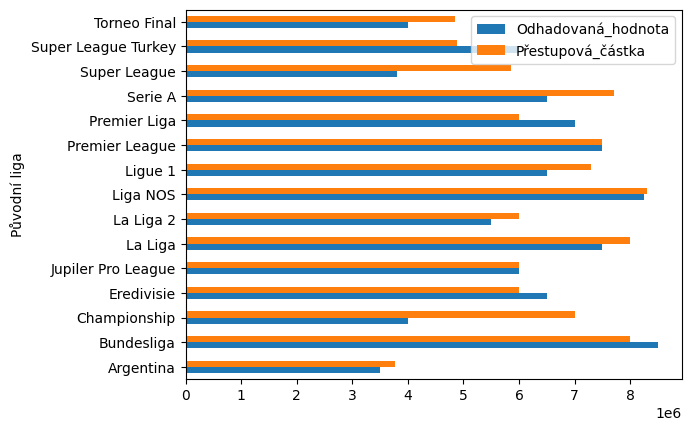

In [32]:
plot2_data = pd.DataFrame({
    'Odhadovaná_hodnota': league_stats_est['50%'].values,
    'Přestupová_částka': league_stats['50%'].values
}, index= league_stats['Původní liga'])

# Plot stacked horizontal bar chart
plot2_data.plot(kind = 'barh')

<Axes: ylabel='Pozice'>

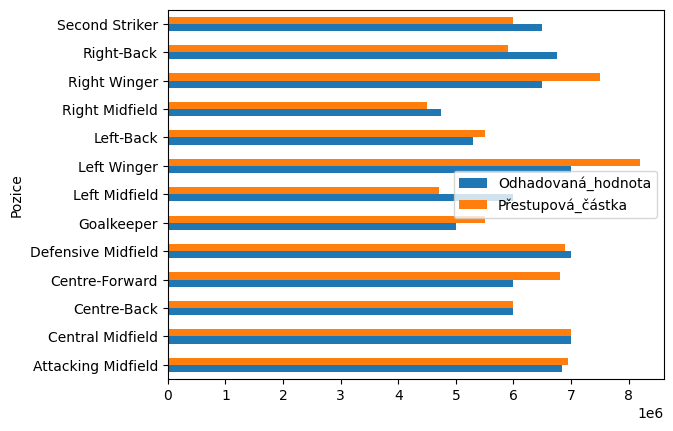

In [33]:
plot3_data = pd.DataFrame({
    'Odhadovaná_hodnota': stat_fees_est_by_position['50%'].values,
    'Přestupová_částka': stat_fees_by_position['50%'].values
}, index= stat_fees_est_by_position['Pozice'])

# Plot stacked horizontal bar chart
plot3_data.plot(kind = 'barh')